## Parte 1.

### 1. Ley de Kirchhoff

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
#Inicializacion de variables
t = [1.00, 1.01, 1.02, 1.03, 1.04]
i = [3.10, 3.12, 3.14, 3.18, 3.24]
L = 0.98
R = 0.142
d_t = 0.01
d = np.zeros(len(t))

d = {'t':t, 'i':i}
dt = pd.DataFrame(data=d)
dt

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [3]:
fun = []
#Para t = 1.00
fun.append(((i[1])-(i[0]))/(d_t))

#Para t = 1.01, 1.02, 1.03
for n in range (1,4):
  fun.append(((i[n+1])-(i[n-1]))/(2*d_t))
  n = n+1

#Para t = 1.04
fun.append(((i[3])-(i[4]))/(-d_t))

dt['d_i'] = fun
dt

,t,i,d_i
0,1.00,3.10,2.0
1,1.01,3.12,2.0
2,1.02,3.14,3.0
3,1.03,3.18,5.0
4,1.04,3.24,6.0


In [4]:
# Hallar el voltaje
v = []

for m in range (0, len(i)):
  v.append(L*(fun[m]) + R*(i[m]))
  m = m + 1

dt['ε(t)'] = v
dt

,t,i,d_i,ε(t)
0,1.00,3.10,2.0,2.40020
1,1.01,3.12,2.0,2.40304
2,1.02,3.14,3.0,3.38588
3,1.03,3.18,5.0,5.35156
4,1.04,3.24,6.0,6.34008


### 2. Lucy's Quartic Kernel

In [5]:
# Inicializacion de variables
h = 1
ad = 5/(np.pi*(h**2))

In [6]:
# Funciones
def q(r, h):
  return abs(r)/h

def w(r, h, ad):
  return ad*(1+3*q(r,h))*((1-q(r,h))**3)

In [7]:
# Derivada simbolica
Q = sp.Symbol('q')
a_d = sp.Symbol('ad')
d_w_s = sp.diff(a_d*(1+(3*Q))*((1-Q)**3), Q)
d_w_s

3*ad*(1 - q)**3 - 3*ad*(1 - q)**2*(3*q + 1)

In [8]:
def d_w(r,h):
  return 3*ad*(1 - q(r,h))**3 - 3*ad*(1 - q(r,h))**2*(3*q(r,h) + 1)

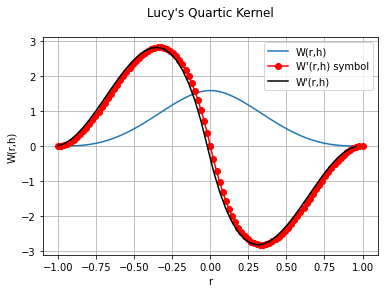

In [9]:
# Grafica de comparacion.
x_p = np.linspace(-1,h)
y_p = w(x_p, h, ad)
d_x = np.linspace(-1,0)
d_w_n = np.diff(w(x_p,h,ad))/np.diff(x_p)

plt.plot(x_p, y_p, label='W(r,h)',)
plt.plot(d_x, -1*d_w(d_x,h), label='W\'(r,h) symbol', marker='o', color='red')
plt.plot(d_x+1, d_w(d_x+1,h),marker='o', color='red')
plt.plot(x_p[0: -1], d_w_n, label='W\'(r,h)',color = 'black')
plt.title('Lucy\'s Quartic Kernel\n')
plt.xlabel('r')
plt.ylabel('W(r,h)')
plt.legend()
plt.grid()
plt.show()


##Parte 2